# Random Forest Regression
Important:I should also try with sales/customer for a specific store

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['figure.figsize'] = [20.0,8.0]
plt.rcParams['figure.dpi']=80

In [2]:
df = pd.read_csv("dataset/preprocessed_train_PCA.csv")

In [3]:
df.shape

(523021, 48)

### Feature engineering

# RANDOM FOREST REGRESSION

In [4]:
df = df.drop(['NumberOfCustomers'], axis=1)
#df = df.drop(['Region','Events'], axis=1)
# I could leave events

In [5]:
#for now let's drop unusable categorical vars
df = df.drop(['Unnamed: 0','StoreType','AssortmentType','Events'], axis=1)

In [6]:
df.head().T

,0,1,2,3,4
StoreID,1000,1000,1000,1000,1000
Date,01/03/2016,02/03/2016,04/03/2016,05/03/2016,06/03/2016
IsHoliday,0,0,0,0,0
IsOpen,1,1,1,1,0
HasPromotions,0,0,0,0,0
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
NumberOfSales,5676,8111,8300,7154,0
Region_AreaKM2,9643,9643,9643,9643,9643
Region_GDP,17130,17130,17130,17130,17130


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

In [8]:
#X_train, X_test, y_train, y_test = train_test_split(df.drop('NumberOfSales', axis=1).values, df.NumberOfSales.values,\
 #                                                   test_size = 0.2)

In [9]:
import modify_dataset as md
train = md.get_fake_train2(df)

In [10]:
train.shape

(477332, 43)

### Selecting predictive features 

In [12]:
features = list(train.columns.values)
features.remove('NumberOfSales')
features.remove('StoreID')
#features.remove('D_Year')
features.remove('Date')
features.remove('IsOpen')
features.remove('D_DayOfweek')
features.remove('Min_VisibilitykM')
features.remove('Max_VisibilityKm')
print("features")

print(features)

features
['IsHoliday', 'HasPromotions', 'NearestCompetitor', 'Region', 'Region_AreaKM2', 'Region_GDP', 'Region_PopulationK', 'CloudCover', 'WindDirDegrees', 'D_Day', 'D_DayOfYear', 'D_Month', 'D_Year', 'StoreType_SuperMarket', 'StoreType_HyperMarket', 'StoreType_StandardMarket', 'StoreType_ShoppingCenter', 'AssortmentType_General', 'AssortmentType_WithNFDept', 'AssortmentType_WithFishDept', 'MeanStoreSales', 'MeanRegionSales', 'D_DayOfWeek_cos', 'D_DayOfWeek_sin', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12']


In [13]:
train[features].head().T

,0,1,2,3,4
IsHoliday,0.000000,0.000000,0.000000,0.000000,0.000000
HasPromotions,0.000000,0.000000,0.000000,0.000000,0.000000
NearestCompetitor,326.000000,326.000000,326.000000,326.000000,326.000000
Region,7.000000,7.000000,7.000000,7.000000,7.000000
Region_AreaKM2,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000
Region_GDP,17130.000000,17130.000000,17130.000000,17130.000000,17130.000000
Region_PopulationK,2770.000000,2770.000000,2770.000000,2770.000000,2770.000000
CloudCover,8.000000,8.000000,8.000000,6.000000,6.000000
WindDirDegrees,23.000000,56.000000,22.000000,108.000000,46.000000
D_Day,1.000000,2.000000,4.000000,5.000000,6.000000


In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
model1 = RandomForestRegressor(n_estimators=80, max_depth=20, n_jobs=-1, verbose=2)

In [16]:
# Can I choose to give it numpy arrays or pandas df or I can only pass np arrays?
model1.fit(train[features], train['NumberOfSales'])

building tree 1 of 80
building tree 2 of 80
building tree 3 of 80
building tree 4 of 80
building tree 5 of 80building tree 6 of 80
building tree 7 of 80building tree 8 of 80


building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80
building tree 33 of 80


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.0min


building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80
building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tree 76 of 80
building tr

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  8.5min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [17]:
idx = model1.feature_importances_.argsort()[::-1]

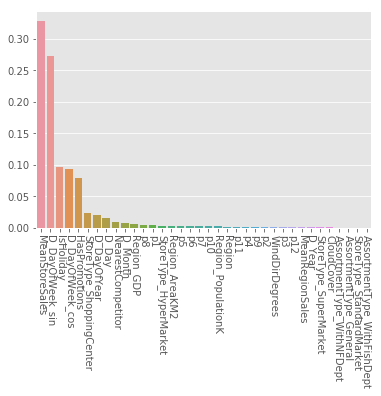

In [18]:
ax = sns.barplot(x=df[features].columns[idx], y=model1.feature_importances_[idx])
_ = plt.setp(ax.get_xticklabels(), rotation=-90)

## Predict

In [19]:
#saving cheat test to test with perfect lags later
test_cheat = md.get_fake_test2(df)

In [20]:
test_cheat.head().T

,364,365,366,367,368
StoreID,1000,1000,1000,1000,1000
Date,01/03/2017,02/03/2017,03/03/2017,04/03/2017,05/03/2017
IsHoliday,0,0,0,0,0
IsOpen,1,1,1,1,0
HasPromotions,0,0,0,0,0
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
NumberOfSales,5509,5881,8463,8146,0
Region_AreaKM2,9643,9643,9643,9643,9643
Region_GDP,17130,17130,17130,17130,17130


In [21]:
test_cheat['_NumberOfSales'] = model1.predict(test_cheat[features])

[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:    0.5s finished
/home/nyxgear/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## BIP Error day by day test

In [22]:
from BIP import get_BIP_error
error1 = get_BIP_error(test_cheat)

Number of regions identified: 11
BIP total error: 0.06665614587323919


## BIP Error cheat test

In [23]:
from BIP import get_BIP_error
error1 = get_BIP_error(test_cheat)

Number of regions identified: 11
BIP total error: 0.06665614587323919


In [24]:
# calculationg R2

# calculate RSS
df_RSS = test_cheat
print(df_RSS.shape)

df_RSS['sqrd_diff'] = df_RSS.apply(lambda x: (x['NumberOfSales'] - x['_NumberOfSales'])**2, axis=1)

RSS = df_RSS['sqrd_diff'].sum()
print('RSS:', RSS)
df_RSS.head()

(43816, 44)
RSS: 29670479049.503025


/home/nyxgear/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,StoreID,Date,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfSales,Region_AreaKM2,Region_GDP,...,p5,p6,p7,p8,p9,p10,p11,p12,_NumberOfSales,sqrd_diff
670,1000,01/01/2018,0,1,0,326,7,8540,9643,17130,...,-0.002064,0.001725,0.000980,-0.001133,0.000278,0.000128,0.000761,-0.000134,10680.490865,4.581701e+06
671,1000,02/01/2018,0,1,0,326,7,10364,9643,17130,...,-0.002162,0.002130,-0.000568,-0.001295,-0.000241,-0.000464,0.000329,-0.000138,7373.941071,8.940452e+06
672,1000,03/01/2018,0,1,0,326,7,4676,9643,17130,...,-0.002271,0.002505,-0.000765,-0.001379,-0.000556,0.000049,-0.000112,-0.000029,4940.893820,7.016874e+04
673,1000,04/01/2018,1,0,0,326,7,0,9643,17130,...,0.000518,-0.000213,0.000020,-0.001233,0.000011,0.001030,-0.000174,0.000493,51.000000,2.601000e+03
674,1000,05/01/2018,0,1,0,326,7,6267,9643,17130,...,0.002466,-0.000155,-0.000270,-0.001132,0.000442,0.000466,-0.000071,-0.000221,7490.310626,1.496489e+06


In [25]:
# calculate TSS

df_TSS = test_cheat
NS_mean = df_TSS['NumberOfSales'].mean()
print('NS_mean', NS_mean)

df_TSS['sqrd_diff'] = df_TSS.apply(lambda x:  (x['_NumberOfSales'] - NS_mean)**2, axis=1)
TSS = df_TSS['sqrd_diff'].sum()
print('TSS:', TSS)
df_TSS.head()

NS_mean 4011.409097133467
TSS: 310924426357.6678


/home/nyxgear/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,StoreID,Date,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfSales,Region_AreaKM2,Region_GDP,...,p5,p6,p7,p8,p9,p10,p11,p12,_NumberOfSales,sqrd_diff
670,1000,01/01/2018,0,1,0,326,7,8540,9643,17130,...,-0.002064,0.001725,0.000980,-0.001133,0.000278,0.000128,0.000761,-0.000134,10680.490865,4.447665e+07
671,1000,02/01/2018,0,1,0,326,7,10364,9643,17130,...,-0.002162,0.002130,-0.000568,-0.001295,-0.000241,-0.000464,0.000329,-0.000138,7373.941071,1.130662e+07
672,1000,03/01/2018,0,1,0,326,7,4676,9643,17130,...,-0.002271,0.002505,-0.000765,-0.001379,-0.000556,0.000049,-0.000112,-0.000029,4940.893820,8.639419e+05
673,1000,04/01/2018,1,0,0,326,7,0,9643,17130,...,0.000518,-0.000213,0.000020,-0.001233,0.000011,0.001030,-0.000174,0.000493,51.000000,1.568484e+07
674,1000,05/01/2018,0,1,0,326,7,6267,9643,17130,...,0.002466,-0.000155,-0.000270,-0.001132,0.000442,0.000466,-0.000071,-0.000221,7490.310626,1.210276e+07


In [26]:
# calculate R2
print("RSS:", RSS, "   TSS:", TSS)

R2 = 1 - (RSS / TSS)
print('R_2:', R2)


RSS: 29670479049.503025    TSS: 310924426357.6678
R_2: 0.9045733415123456


### Saving TEST

In [27]:
#test.to_csv('./dataset/RFR5_fake_test.csv', index=False)

In [28]:
estim = model1.estimators_ 

In [29]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [30]:
mean_absolute_error(test['NumberOfSales'], test['_NumberOfSales'])


KeyError: '_NumberOfSales'

In [ ]:
r2_score(test['NumberOfSales'], test['_NumberOfSales'])

In [ ]:
#defining mape
from sklearn.utils import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true = y_true.reshape(1, -1)
    y_pred = y_pred.reshape(1, -1)
    #y_true, y_pred = check_array(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mean_absolute_percentage_error(test['NumberOfSales'], test['_NumberOfSales'])

In [ ]:
X_train

In [ ]:
X_test[:, [3]].shape

In [ ]:
print("Residual sum of squares: %.2f"
  % ((y_pred - y_test) ** 2).sum())

#why memory error??

In [ ]:
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w


def rmspe(yhat, y):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe


def rmspe_xg(yhat, y):
   # y = y.values
   # y = y.get_label()
    y = np.exp(y) - 1
    yhat = np.exp(yhat) - 1
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean(w * (y - yhat)**2))
    return "rmspe", rmspe

In [ ]:
rmspe_xg(y_pred,y_test)

## Sample of predicted results

In [ ]:
import matplotlib.pyplot as plt

y_pred_subset = test['_NumberOfSales'][500:600]
x_coordinate = [ 1 * i for i in range(len(y_pred_subset)) ]
plt.plot(x_coordinate,y_pred_subset)
plt.show()

## Sample of real results

In [ ]:
#REAL
import matplotlib.pyplot as plt

y_train_subset = test['NumberOfSales'][500:600]
x_coordinate = [ 1 * i for i in range(len(y_train_subset)) ]
plt.plot(x_coordinate,y_train_subset)
plt.show()

## Real-Predicted

In [ ]:
plt.plot(x_coordinate,y_train_subset)
plt.plot(x_coordinate,y_pred_subset)

plt.legend(['Predicted', 'Real'], loc='upper left')
plt.show()

### Saving model

In [ ]:
#import pickle
#RFR_1 = pickle.dumps(model1)
#clf2 = pickle.loads(s)
#clf2.predict(X[0:1])
#pickle.dump(model1, open("models\RFR_1","wb"))
#model1 = pickle.load(file=open("models\RFR_1","rb"))

## For the submission

In [ ]:
df_test = pd.read_csv

In [ ]:
df_test.IsOpen.unique()

In [ ]:
ind_open = df_test.IsOpen == 1
ind_closed = df_test.IsOpen == 0
df_test2 = df_test[ind_open]

In [ ]:
df_test2.drop('IsOpen', axis=1, inplace=True)

In [ ]:
df_test2.head().T

In [ ]:
X_out = df_test2.values

In [ ]:
y_out = model1.predict(X_out)

In [ ]:
df_out = pd.DataFrame(np.zeros(len(df_test)), columns=['NumberOfSales'])

In [ ]:
df_out[ind_open] = y_out.reshape(-1,1)

In [ ]:
df_out.set_index(np.arange(len(df_out))+1, inplace=True)

In [ ]:
df_out.index.name = 'Id'

In [ ]:
df_out.head()